### Pre-processing of the dataset.

In [1]:
# load the dataset
import pandas as pd
df=pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Compute the success rate of the bank marketing campaign.

In [2]:
# Create a subset of the data with customers who subscribed to the bank's services.
df_yes=df[df["y"]=="yes"]
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [3]:
# Calculate the success rate
success_rate=len(df_yes)/len(df)
success_rate

0.11698480458295547

### Visualizations of the dataset
Plot the attributes of the subset "df_yes" to understand the characteristics of customers who signed up for the bank's services
as a result of the marketing campaign.

In [4]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


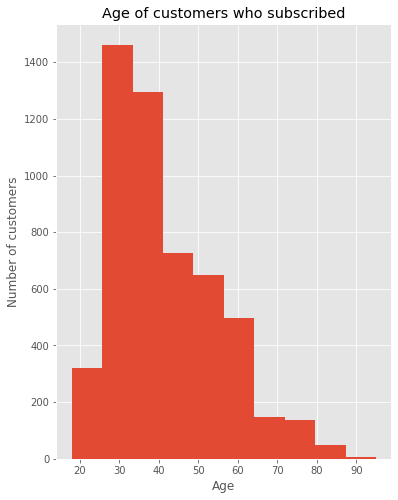

In [5]:
df_yes["age"].plot(kind="hist",figsize=(6,8))
plt.title("Age of customers who subscribed")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

Most of the customers who responded to the bank's marketing campaign and signed up for its services were between the age of 30 and 60.

In [6]:
print("Maximum balance: ",max(df_yes["balance"]))
print("Minimum balance: ",min(df_yes["balance"]))

Maximum balance:  81204
Minimum balance:  -3058


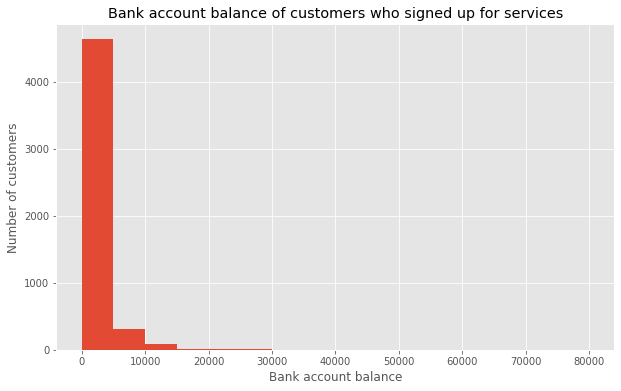

In [7]:
df_yes["balance"].plot(kind="hist",figsize=(10,6),bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000])
plt.title("Bank account balance of customers who signed up for services")
plt.xlabel("Bank account balance")
plt.ylabel("Number of customers")
plt.show()

An overwhelming majority of the customers who signed up for the bank's services had balance equal to or below 5,000.

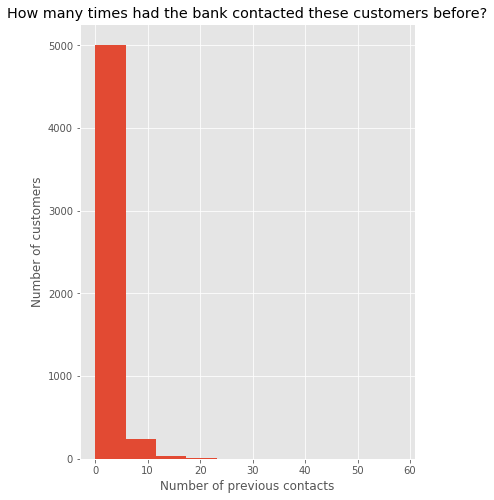

In [8]:
df_yes["previous"].plot(kind="hist",figsize=(6,8))
plt.title("How many times had the bank contacted these customers before?")
plt.xlabel("Number of previous contacts")
plt.ylabel("Number of customers")
plt.show()

An overwhelming majority of the customers who signed up for the bank's services were contacted 5 times or less before. It seems that persistence does not help that much in customer acquisition here.

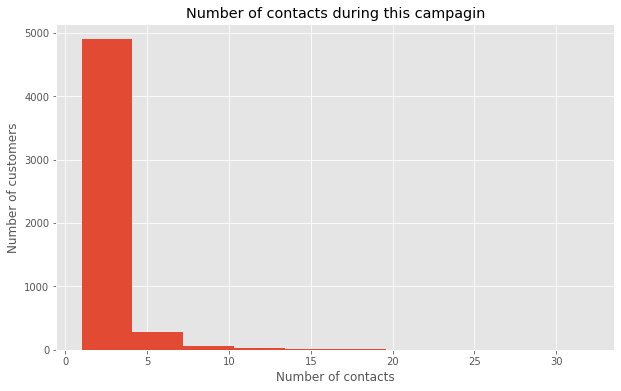

In [9]:
df_yes["campaign"].plot(kind="hist",figsize=(10,6))
plt.title("Number of contacts during this campagin")
plt.xlabel("Number of contacts")
plt.ylabel("Number of customers")
plt.show()

The majority of the customers who signed up for the bank's services were last contacted less than 200 days ago. So, if the bank wanted to increase the success rate of its marketing campaign, timely follow-up would be essential.

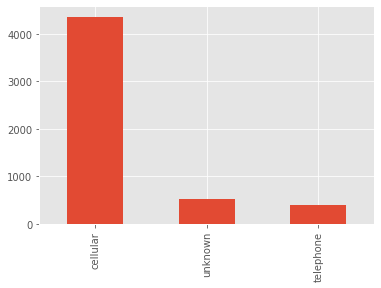

In [10]:
df_yes['contact'].value_counts().plot(kind='bar')

Contact by celluar phone is the most effective method.

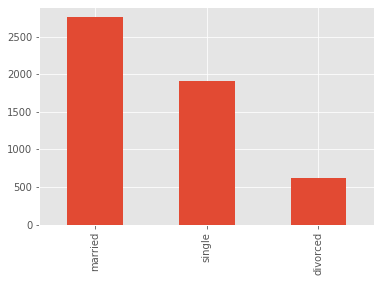

In [11]:
df_yes['marital'].value_counts().plot(kind='bar')

Most customers who signed up for the bank's services were couples. 

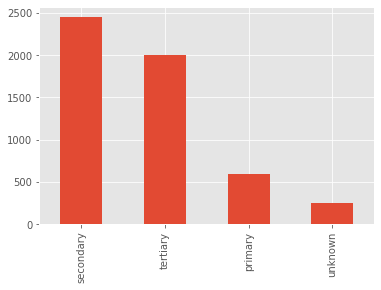

In [12]:
df_yes['education'].value_counts().plot(kind='bar')

An overwhelming majority of the people who signed up for the bank's services had at least a high-school diploma. This indicated education increases people's awareness of financial health and sensitivity to financial products.

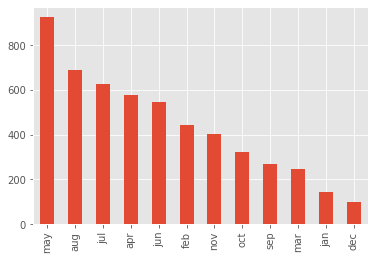

In [13]:
df_yes['month'].value_counts().plot(kind='bar')

May is the best month for the bank to launch marketing campaign.

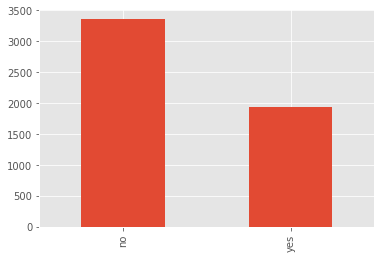

In [14]:
df_yes["housing"].value_counts().plot(kind='bar')

Most customers that signed up for the bank's services had a mortgage.

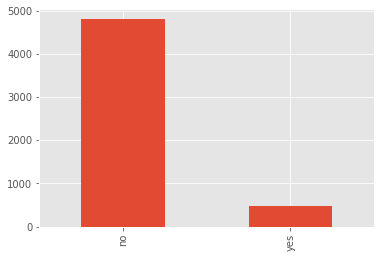

In [15]:
df_yes['loan'].value_counts().plot(kind='bar')

Most of the customers that signed up for the bank's services had no personal loan.

Let's summarize the the major characteristics of the customers who responded to the bank's marketing campaign and signed up for its services:
- Were etween the age of 30 and 60;
- Had bank balance equal to or less than 5,000;
- Were contacted five times or less before;
- Were married or singled;
- Had at least high school diploma.
- The best month to launch a marketing campaign was May, followed by August, July, April and June.
- Had a mortgage;
- Had no personal loan.
- Were contacted by celluar phone.


### Perform K-means clustering on the customers who signed up for the bank's services.

In [16]:
# Import the libary for integer encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
# Apply integer encodding to the "contact" column.
from numpy import array
data=df_yes["contact"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
integer_encoder

array([2, 2, 2, ..., 0, 0, 0])

In [18]:
# Convert the array of interger codes for "contact" column into pandas data frame.
Contact_integer_encoder=pd.DataFrame(data=integer_encoder)
Contact_integer_encoder

,0
0,2
1,2
2,2
3,2
4,2
...,...
5284,0
5285,0
5286,0
5287,0


In [19]:
# Append the "Contact_code" column to the "df_yes" subset and display the data set.
df_yes=df_yes.assign(Contact_code=Contact_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Contact_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,2
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0


In [20]:
# Print out the unique values of the original "contact" column and the "Contact_code" column to see what integer code is
# assigned to each contact method.
import numpy as np
print(np.unique(df_yes["contact"]))
print(np.unique(df_yes["Contact_code"]))

['cellular' 'telephone' 'unknown']
[0 1 2]


So, integer encoding assigned "0" to "celluar", "1" to "telephone","2" to "unknown".

### Appply integer encoding to all categorical variables and print out the unique values of each original column and the encoded column.

In [21]:
data=df_yes["job"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)

In [22]:
job_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(job_code=job_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Contact_code,job_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2,0
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,2,0
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2,9
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2,7
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,0,5
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,0,9
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0,9
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,5


In [23]:
print(np.unique(df_yes["job"]))
print(np.unique(df_yes["job_code"]))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [24]:
data=df_yes["marital"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
marital_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(marital_code=marital_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Contact_code,job_code,marital_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2,0,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,2,0,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2,9,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2,7,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,0,5,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,0,9,2
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0,9,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,5,0


In [25]:
print(np.unique(df_yes["marital"]))
print(np.unique(df_yes["marital_code"]))

['divorced' 'married' 'single']
[0 1 2]


In [26]:
data=df_yes["education"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
education_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(education_code=education_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Contact_code,job_code,marital_code,education_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,yes,2,0,1,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,yes,2,0,1,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,-1,0,unknown,yes,2,9,1,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,-1,0,unknown,yes,2,7,1,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2,-1,0,unknown,yes,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,300,1,40,8,failure,yes,0,5,1,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,386,2,-1,0,unknown,yes,0,9,2,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,yes,0,9,1,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,yes,0,5,0,0


In [27]:
print(np.unique(df_yes["education"]))
print(np.unique(df_yes["education_code"]))

['primary' 'secondary' 'tertiary' 'unknown']
[0 1 2 3]


In [28]:
data=df_yes["default"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
default_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(default_code=default_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,Contact_code,job_code,marital_code,education_code,default_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1,-1,0,unknown,yes,2,0,1,1,0
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1,-1,0,unknown,yes,2,0,1,1,0
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,-1,0,unknown,yes,2,9,1,1,0
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,1,-1,0,unknown,yes,2,7,1,1,0
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,2,-1,0,unknown,yes,2,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,1,40,8,failure,yes,0,5,1,1,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,2,-1,0,unknown,yes,0,9,2,1,0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,3,-1,0,unknown,yes,0,9,1,2,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,2,-1,0,unknown,yes,0,5,0,0,0


In [29]:
print(np.unique(df_yes["default"]))
print(np.unique(df_yes["default_code"]))

['no' 'yes']
[0 1]


In [30]:
data=df_yes["housing"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
housing_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(housing_code=housing_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,Contact_code,job_code,marital_code,education_code,default_code,housing_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,2,0,1,1,0,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,2,0,1,1,0,0
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,2,9,1,1,0,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,2,7,1,1,0,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,2,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,40,8,failure,yes,0,5,1,1,0,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,-1,0,unknown,yes,0,9,2,1,0,0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,-1,0,unknown,yes,0,9,1,2,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,-1,0,unknown,yes,0,5,0,0,0,0


In [31]:
print(np.unique(df_yes["housing"]))
print(np.unique(df_yes["housing_code"]))

['no' 'yes']
[0 1]


In [32]:
data=df_yes["loan"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
loan_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(loan_code=loan_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,Contact_code,job_code,marital_code,education_code,default_code,housing_code,loan_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,unknown,yes,2,0,1,1,0,1,0
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,unknown,yes,2,0,1,1,0,0,0
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,unknown,yes,2,9,1,1,0,1,0
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,unknown,yes,2,7,1,1,0,1,0
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,unknown,yes,2,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,8,failure,yes,0,5,1,1,0,0,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,0,unknown,yes,0,9,2,1,0,0,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,unknown,yes,0,9,1,2,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,unknown,yes,0,5,0,0,0,0,0


In [33]:
print(np.unique(df_yes["loan"]))
print(np.unique(df_yes["loan_code"]))

['no' 'yes']
[0 1]


In [34]:
data=df_yes["poutcome"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
poutcome_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(poutcome_code=poutcome_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,Contact_code,job_code,marital_code,education_code,default_code,housing_code,loan_code,poutcome_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,unknown,yes,2,0,1,1,0,1,0,3
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,unknown,yes,2,0,1,1,0,0,0,3
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,unknown,yes,2,9,1,1,0,1,0,3
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,unknown,yes,2,7,1,1,0,1,0,3
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,unknown,yes,2,0,1,2,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,failure,yes,0,5,1,1,0,0,0,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,unknown,yes,0,9,2,1,0,0,1,3
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,unknown,yes,0,9,1,2,0,0,0,3
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,unknown,yes,0,5,0,0,0,0,0,3


In [35]:
print(np.unique(df_yes["poutcome"]))
print(np.unique(df_yes["poutcome_code"]))

['failure' 'other' 'success' 'unknown']
[0 1 2 3]


In [36]:
data=df_yes["month"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
month_integer_encoder=pd.DataFrame(data=integer_encoder)
df_yes=df_yes.assign(month_code=month_integer_encoder.values)
df_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,Contact_code,job_code,marital_code,education_code,default_code,housing_code,loan_code,poutcome_code,month_code
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,yes,2,0,1,1,0,1,0,3,8
86,56,admin.,married,secondary,no,45,no,no,unknown,5,...,yes,2,0,1,1,0,0,0,3,8
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,yes,2,9,1,1,0,1,0,3,8
129,55,services,married,secondary,no,2476,yes,no,unknown,5,...,yes,2,7,1,1,0,1,0,3,8
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,yes,2,0,1,2,0,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,yes,0,5,1,1,0,0,0,0,9
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,...,yes,0,9,2,1,0,0,1,3,9
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,yes,0,9,1,2,0,0,0,3,9
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,yes,0,5,0,0,0,0,0,3,9


In [37]:
print(np.unique(df_yes["month"]))
print(np.unique(df_yes["month_code"]))

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [38]:
df_yes=df_yes[["age","balance","day","duration","campaign","previous","Contact_code","job_code","marital_code","education_code","default_code","housing_code","loan_code","poutcome_code","month_code"]]
df_yes

,age,balance,day,duration,campaign,previous,Contact_code,job_code,marital_code,education_code,default_code,housing_code,loan_code,poutcome_code,month_code
83,59,2343,5,1042,1,0,2,0,1,1,0,1,0,3,8
86,56,45,5,1467,1,0,2,0,1,1,0,0,0,3,8
87,41,1270,5,1389,1,0,2,9,1,1,0,1,0,3,8
129,55,2476,5,579,1,0,2,7,1,1,0,1,0,3,8
168,54,184,5,673,2,0,2,0,1,2,0,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,8,0,5,1,1,0,0,0,0,9
45205,25,505,17,386,2,0,0,9,2,1,0,0,1,3,9
45206,51,825,17,977,3,0,0,9,1,2,0,0,0,3,9
45207,71,1729,17,456,2,0,0,5,0,0,0,0,0,3,9


In [39]:
# Calculate the average silhouette score to determine the "good number" of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_yes)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_yes, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_yes, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.8229455386257045
For n_clusters = 3 The average silhouette_score is : 0.7397457614597833
For n_clusters = 4 The average silhouette_score is : 0.6667405075769587
For n_clusters = 5 The average silhouette_score is : 0.6359111699319159
For n_clusters = 6 The average silhouette_score is : 0.5771713244847699
For n_clusters = 7 The average silhouette_score is : 0.5774270267278564
For n_clusters = 8 The average silhouette_score is : 0.521171235766127
For n_clusters = 9 The average silhouette_score is : 0.5231382738648539
For n_clusters = 10 The average silhouette_score is : 0.46573339966922966


Based on average silhouette score, the optimal number of clusters is 2, since that is when the average silhouette score is highest. "3" is almost a good number of clusters. Both have average silhouette score well above 0.5.

In [40]:
# K-Means clustering with 3 clusters.
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means.fit(df_yes)
labels = k_means.labels_
print(labels)

[1 1 1 ... 1 1 0]


In [41]:
# Append the cluster labels to the dataset that contans customers who signed up for the bank's services as a result of
# marketing campagin.
df_yes=df_yes.assign(label=labels)
df_yes

,age,balance,day,duration,campaign,previous,Contact_code,job_code,marital_code,education_code,default_code,housing_code,loan_code,poutcome_code,month_code,label
83,59,2343,5,1042,1,0,2,0,1,1,0,1,0,3,8,1
86,56,45,5,1467,1,0,2,0,1,1,0,0,0,3,8,1
87,41,1270,5,1389,1,0,2,9,1,1,0,1,0,3,8,1
129,55,2476,5,579,1,0,2,7,1,1,0,1,0,3,8,1
168,54,184,5,673,2,0,2,0,1,2,0,0,0,3,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,8,0,5,1,1,0,0,0,0,9,1
45205,25,505,17,386,2,0,0,9,2,1,0,0,1,3,9,1
45206,51,825,17,977,3,0,0,9,1,2,0,0,0,3,9,1
45207,71,1729,17,456,2,0,0,5,0,0,0,0,0,3,9,1


Display the key statistics of each numeric attributes for each cluster.

In [42]:
df_yes["age"].groupby(df_yes["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,580.0,45.168966,14.365056,20.0,33.0,42.0,56.0,87.0
1,4680.0,41.207906,13.290165,18.0,31.0,38.0,49.0,95.0
2,29.0,46.275862,17.709756,24.0,33.0,41.0,61.0,84.0


In [43]:
df_yes["age"].groupby(df_yes["label"]).median()

label
0    42
1    38
2    41
Name: age, dtype: int64

In [44]:
df_yes["balance"].groupby(df_yes["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,580.0,7149.655172,3082.762470,4060.0,4807.0,5997.5,8556.0,19317.0
1,4680.0,952.451709,1042.001970,-3058.0,163.0,569.0,1495.0,4047.0
2,29.0,32362.034483,16022.721011,20138.0,22867.0,27696.0,32685.0,81204.0


In [45]:
df_yes["balance"].groupby(df_yes["label"]).median()

label
0     5997.5
1      569.0
2    27696.0
Name: balance, dtype: float64

In [46]:
# Duraiton was originally in seconds. Dividing by 60 gives the  number of minutes.
df_yes["duration"].div(60).groupby(df_yes["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,580.0,8.723966,6.326439,0.766667,3.900000,6.841667,12.000000,39.533333
1,4680.0,8.992621,6.571529,0.133333,4.083333,7.150000,12.116667,64.683333
2,29.0,7.487931,5.928953,2.216667,4.050000,5.516667,9.466667,27.050000


In [47]:
df_yes["duration"].div(60).groupby(df_yes["label"]).median()

label
0    6.841667
1    7.150000
2    5.516667
Name: duration, dtype: float64

In [48]:
df_yes["campaign"].groupby(df_yes["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,580.0,2.163793,1.907824,1.0,1.0,2.0,3.0,21.0
1,4680.0,2.136538,1.921173,1.0,1.0,2.0,2.0,32.0
2,29.0,2.413793,2.322518,1.0,1.0,2.0,2.0,9.0


In [49]:
df_yes["campaign"].groupby(df_yes["label"]).median()

label
0    2
1    2
2    2
Name: campaign, dtype: int64

In [50]:
df_yes["previous"].groupby(df_yes["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,580.0,1.268966,2.662359,0.0,0.0,0.0,2.0,26.0
1,4680.0,1.157051,2.542629,0.0,0.0,0.0,1.0,58.0
2,29.0,1.344828,2.004920,0.0,0.0,0.0,2.0,7.0


In [51]:
df_yes["previous"].groupby(df_yes["label"]).median()

label
0    0
1    0
2    0
Name: previous, dtype: int64

In [52]:
print("Proportion of Cluster 1: ", len(df_yes[df_yes["label"]==0])*100/len(df_yes),"%")
print("Proportion of Cluster 2: ", len(df_yes[df_yes["label"]==1])*100/len(df_yes),"%")
print("Proportion of Cluster 3: ", len(df_yes[df_yes["label"]==2])*100/len(df_yes),"%")

Proportion of Cluster 1:  10.966156173189638 %
Proportion of Cluster 2:  88.48553601815088 %
Proportion of Cluster 3:  0.5483078086594819 %


Summary of the results of K-Means clustering analysis on the data subset that contains the customers who signed up for the bank's services as a result of this campaign: <br>

<center>Cluster 0 -- 88.49% <br><center>

|Attribute|Mean|Median|
|---------|----|------|
|Age|41.2|38|
|Balance:Bank account balance|952.5|569|
|Duration:Contact duration (in minutes)|9|7.2|
|Campaign: Number of contacts performed during this campaign|2.1|2|
|Previous: Number of contacts performed before this campaign|1.2|0| 

<center>Cluster 2 -- 0.55% <br> <center>
    
|Attribute|Mean|Median|
|---------|----|------|
|Age|46.3|41|
|Balance:Bank account balance|32362.0|27692|
|Duration:Contact duration (in minutes)|9|7.2|
|Campaign:Number of contacts during this campaign|2.4|2|
|Previous: Number of contacts performed before this campaign|1.3|0|
    
<center>Cluster 3 -- 10.97% <br> <center>

|Attribute|Mean|Median|
|---------|----|------|
|Age|45.2|42|
|Balance:Bank account balance|7149.7|5997.5|
|Duration:Contact duration (in minutes)|8.7|6.8|
|Campaign:Number of contacts during this campaign|2.2|2|
|Previous: Number of contacts performed before this campaign|1.3|0|

As shown above during pre-processing of the data, success rate was only 11.70%. With constrained budget and low success rate, it is important for the bank to target the right customers during a marketing cammpaign in order to maximum the return on the asset invested during the marketing campaign. The graphs shown in the "Visualizations of data" secton show the prevalent characteristics of customers who signed up for the bank's services as a result of this campaign. To recapture, these prevalent characteristics are: <br>
- Were etween the age of 30 and 60;
- Had bank balance equal to or less than 5,000;
- Were contacted five times or less before;
- Were married or singled;
- Had at least high school diploma.
- The best month to launch a marketing campaign was May, followed by August, July, April and June.
- Had a mortgage;
- Had no personal loan.
- Were contacted by celluar phhone

**Combined with the results of the K-Means analysis on the data subset that contained customers who signed up, the bank can design more effective marketing strategies to increase success rate. Based on the analyses above, an example of such strategy would be to target customers:**
- who are around the age of 40;
- Have bank account balance around $600. 
- Are either married or single.
- Have at least high school diploma.
- Have a mortgage.
- Have no personal loan.
- Were not contacted during the previous compaign or were contacted only a few times.

During the campaign:
- Be prepared to contact each customer at least 5 times to get the result.
- Be prepared to spend an average of 9 minutes on each call.
- Contact the customer by celluar phone. This is the most effective method. If not cellular phone, contact by phone if possible.

**Note: This is just one example of how the analytical results can be used to design more effective marketing strategies. If this data set contains profit the bank earned from each customer, the results may be even more revealing on what kind of customers they bank should target in order to maximize benefit. Embrace data-driven decision-making approach and enjoy better return of investment!**


Source:<br>
Machine Learning Repository, University of Irvine: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing